<a href="https://colab.research.google.com/github/iptishadugtal/SENTIMENT-POLARITY-DETECTION-AND-TOPIC-MODELLING/blob/main/Comparitive_study_and_sentiment_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparing performance metrics of all models**

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_dataset = '/content/train.csv'
test_dataset = '/content/test.csv'

print (os.path.exists(train_dataset))
print (os.path.exists(test_dataset))

False
False


In [ ]:
train_df = pd.read_csv(train_dataset, encoding='ISO-8859-1')
test_df = pd.read_csv(test_dataset, encoding='ISO-8859-1')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


In [ ]:
train_df.isnull().sum()

,0
textID,0
text,1
selected_text,1
sentiment,0
Time of Tweet,0
Age of User,0
Country,0
Population -2020,0
Land Area (Km²),0
Density (P/Km²),0


In [ ]:
train_df = train_df.dropna()
train_df.isnull().sum()

,0
textID,0
text,0
selected_text,0
sentiment,0
Time of Tweet,0
Age of User,0
Country,0
Population -2020,0
Land Area (Km²),0
Density (P/Km²),0


In [ ]:
test_df.isnull().sum()

,0
textID,1281
text,1281
sentiment,1281
Time of Tweet,1281
Age of User,1281
Country,1281
Population -2020,1281
Land Area (Km²),1281
Density (P/Km²),1281


In [ ]:
test_df = test_df.dropna()
test_df.isnull().sum()

,0
textID,0
text,0
sentiment,0
Time of Tweet,0
Age of User,0
Country,0
Population -2020,0
Land Area (Km²),0
Density (P/Km²),0


In [ ]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Applying preprocessing on test dataset
test_df['processed_text'] = test_df['text'].apply(preprocess_text)
test_df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),processed_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,last session day http://twitpic.com/67ezh
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,shanghai also really exciting (precisely -- sk...
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,"recession hit veronique branquinho, quit compa..."
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0,happy bday!
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0,http://twitpic.com/4w75p - like it!!


In [ ]:
# Converting text data to TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
train_TFIDF = vectorizer.fit_transform(train_df['processed_text'])
test_TFIDF = vectorizer.transform(test_df['processed_text'])

X = train_TFIDF
y = train_df['sentiment']
NB_model = MultinomialNB()
NB_model.fit(X, y)

MultinomialNB()

In [ ]:
predictions = NB_model.predict(test_TFIDF)

print(f"Accuracy: {accuracy_score(test_df['sentiment'], predictions)}")
print(classification_report(test_df['sentiment'], predictions))

Accuracy: 0.6386530843237125
              precision    recall  f1-score   support

    negative       0.73      0.50      0.59      1001
     neutral       0.55      0.77      0.65      1430
    positive       0.76      0.60      0.67      1103

    accuracy                           0.64      3534
   macro avg       0.68      0.62      0.63      3534
weighted avg       0.67      0.64      0.64      3534



In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
vectorizer = TfidfVectorizer(max_features=5000)
train_TFIDF = vectorizer.fit_transform(train_df['processed_text'])
test_TFIDF = vectorizer.transform(test_df['processed_text'])

X = train_TFIDF
y = train_df['sentiment']

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X, y)

# Make predictions on the test data
y_pred = logistic_model.predict(test_TFIDF)

accuracy = accuracy_score(test_df['sentiment'], y_pred)
f1 = f1_score(test_df['sentiment'], y_pred, average="weighted")
report = classification_report(test_df['sentiment'], y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print("\nClassification Report:\n", report)


Accuracy: 0.6994906621392191
F1 Score: 0.7004289723749718

Classification Report:
               precision    recall  f1-score   support

    negative       0.72      0.63      0.67      1001
     neutral       0.63      0.75      0.69      1430
    positive       0.80      0.70      0.74      1103

    accuracy                           0.70      3534
   macro avg       0.72      0.69      0.70      3534
weighted avg       0.71      0.70      0.70      3534



In [ ]:
file_path = '/content/IIITH_Codemixed.txt'
df = pd.read_csv(file_path, sep='\t', header=None, names=["id", "comment", "sentiment", "sentiment_pred"])
print(df.head())

   id                                            comment  sentiment  \
0   1  Ye song nahi hi Ye MODI Ji ka mehnat ka rang h...          2   
1   3  Love u sir love u soo much urs I'ts beautyful ...          2   
2   4  Arae sur jee pahelae hamare bharat ke bachho k...          1   
3   5  Wah! Jitni sundar geet ke bhao hain utnihi sun...          2   
4   8  Sundar ekdam sahi Gaya Hua gana.chhotisi gudiy...          2   

   sentiment_pred  
0               2  
1               2  
2               1  
3               2  
4               2  


In [ ]:
def preprocess_text(text):
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

In [ ]:
df['comment'] = df['comment'].apply(preprocess_text)
df.head()

,id,comment,sentiment,sentiment_pred
0,1,ye song nahi hi ye modi ji ka mehnat ka rang h...,2,2
1,3,love u sir love u soo much urs i'ts beautyful ...,2,2
2,4,arae sur jee pahelae hamare bharat ke bachho k...,1,1
3,5,wah! jitni sundar geet ke bhao hain utnihi sun...,2,2
4,8,sundar ekdam sahi gaya hua gana.chhotisi gudiy...,2,2


In [ ]:
pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=892a9adf1592b5edd834ce41c57b30edddc51e2811dfdd6dc31fb19487b22262
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succ

In [ ]:
from googletrans import Translator
import pandas as pd

translator = Translator()

def chunk_text(text, max_length=5000):
    chunks = []
    while len(text) > max_length:
        split_at = text[:max_length].rfind(" ")
        if split_at == -1:
            split_at = max_length
        chunks.append(text[:split_at])
        text = text[split_at:].strip()
    chunks.append(text)
    return chunks

# Function to translate text
def translate_text(text, src_language='auto', dest_language='en'):
    max_characters = 140  # Max character length for chunks
    try:
        if len(text) <= max_characters:
            translation = translator.translate(text, src=src_language, dest=dest_language)
            return translation.text
        else:
            chunks = chunk_text(text, max_length=max_characters)
            translated_chunks = []
            for chunk in chunks:
                translation = translator.translate(chunk, src=src_language, dest=dest_language)
                translated_chunks.append(translation.text)
            return " ".join(translated_chunks)
    except Exception as e:
        print(f"Error during translation: {e}")
        return text  # Return the original text in case of error




In [ ]:
df.head()

,id,comment,sentiment,sentiment_pred,Processed Data
0,1,ye song nahi hi ye modi ji ka mehnat ka rang h...,2,2,2
1,3,love u sir love u soo much urs i'ts beautyful ...,2,2,2
2,4,arae sur jee pahelae hamare bharat ke bachho k...,1,1,1
3,5,wah! jitni sundar geet ke bhao hain utnihi sun...,2,2,2
4,8,sundar ekdam sahi gaya hua gana.chhotisi gudiy...,2,2,2


In [ ]:

column_data = df['comment']

new_column_data = []
i = 0
for row in column_data:
    try:
        new_row = translate_text(row)
        new_column_data.append(new_row)
        print(f"Processed row {i}")
        i += 1
    except Exception as e:
        print(f"Error at row {i}: {str(e)}")
        new_column_data.append(row)
        i += 1
        time.sleep(5)

df['Processed Data'] = new_column_data
df.head()

Processed row 0
Processed row 1
Processed row 2
Processed row 3
Processed row 4
Processed row 5
Processed row 6
Processed row 7
Processed row 8
Processed row 9
Processed row 10
Processed row 11
Processed row 12
Processed row 13
Processed row 14
Processed row 15
Processed row 16
Processed row 17
Processed row 18
Processed row 19
Processed row 20
Processed row 21
Processed row 22
Processed row 23
Processed row 24
Processed row 25
Processed row 26
Processed row 27
Processed row 28
Processed row 29
Processed row 30
Processed row 31
Processed row 32
Processed row 33
Processed row 34
Processed row 35
Processed row 36
Processed row 37
Processed row 38
Processed row 39
Processed row 40
Processed row 41
Processed row 42
Processed row 43
Processed row 44
Processed row 45
Processed row 46
Processed row 47
Processed row 48
Processed row 49
Processed row 50
Processed row 51
Processed row 52
Processed row 53
Processed row 54
Processed row 55
Processed row 56
Processed row 57
Processed row 58
Process

,id,comment,sentiment,sentiment_pred,Processed Data
0,1,ye song nahi hi ye modi ji ka mehnat ka rang h...,2,2,"Not only this song, this is the color of Modi ..."
1,3,love u sir love u soo much urs i'ts beautyful ...,2,2,love u sir love u soo much urs i'ts beautyful ...
2,4,arae sur jee pahelae hamare bharat ke bachho k...,1,1,Before RA Sur Ji India or Bacho Ka Parao .... ...
3,5,wah! jitni sundar geet ke bhao hain utnihi sun...,2,2,HeThe beautiful songs of the beautiful song ar...
4,8,sundar ekdam sahi gaya hua gana.chhotisi gudiy...,2,2,Beautiful is perfect gan.


In [ ]:
output_file_path = '/content/processed_IIITH_Codemixed.csv'  # Specify the desired file path
df.to_csv(output_file_path, index=False)

print(f"Data has been saved to {output_file_path}")

Data has been saved to /content/processed_IIITH_Codemixed.csv


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Converting text data to TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
TFIDF = vectorizer.fit_transform(df['comment'])
X_train, X_test, y_train, y_test = train_test_split(TFIDF, df['sentiment'], test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

y_pred = NB_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print("\nClassification Report:\n", report)


Accuracy: 0.645618556701031
F1 Score: 0.5963451351608152

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.08      0.14       116
           1       0.61      0.92      0.73       395
           2       0.76      0.48      0.59       265

    accuracy                           0.65       776
   macro avg       0.76      0.49      0.49       776
weighted avg       0.70      0.65      0.60       776



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
TFIDF = vectorizer.fit_transform(df['comment'])
X_train, X_test, y_train, y_test = train_test_split(TFIDF, df['sentiment'], test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print("\nClassification Report:\n", report)



Accuracy: 0.6662371134020618
F1 Score: 0.6484172390936718

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.31      0.44       116
           1       0.65      0.85      0.74       395
           2       0.68      0.54      0.61       265

    accuracy                           0.67       776
   macro avg       0.70      0.57      0.60       776
weighted avg       0.68      0.67      0.65       776



SVM model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(max_features=5000)
TFIDF = vectorizer.fit_transform(df['comment'])
X_train, X_test, y_train, y_test = train_test_split(TFIDF, df['sentiment'], test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print("\nClassification Report:\n", report)


Accuracy: 0.6778350515463918
F1 Score: 0.6629280244403304

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.36      0.49       116
           1       0.66      0.86      0.75       395
           2       0.70      0.55      0.61       265

    accuracy                           0.68       776
   macro avg       0.71      0.59      0.62       776
weighted avg       0.69      0.68      0.66       776



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

excel_file = 'finfin2024.csv'
new_data1 = pd.read_csv(excel_file)
new_data1.head()

,text
0,whats there for Madhya Pradesh
1,for the middle class this is worst regime in t...
2,all this is only tax for the poor and no one pays
3,Favouritism towards Bihar with taxes on stocks...
4,They are clapping for increasing the tax as if...


# *Preprocessing*

In [ ]:
import re
import string
import emoji
from nltk.corpus import stopwords

# Preprocessing function
def preprocess(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in emoji.EMOJI_DATA])

    text = re.sub(r'http\S+|www\S+', '', text)  # Removes URLs starting with http://, https://, or www.

    text = text.translate(str.maketrans('', '', string.punctuation))

    text = re.sub(r'\d+', '', text)

    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    text = re.sub(r'\s+', ' ', text).strip()

    return text



In [ ]:
new_data1['Comment'] = new_data1['text'].apply(preprocess)

In [ ]:
new_data1.head()
print(new_data1.shape)

(201, 2)


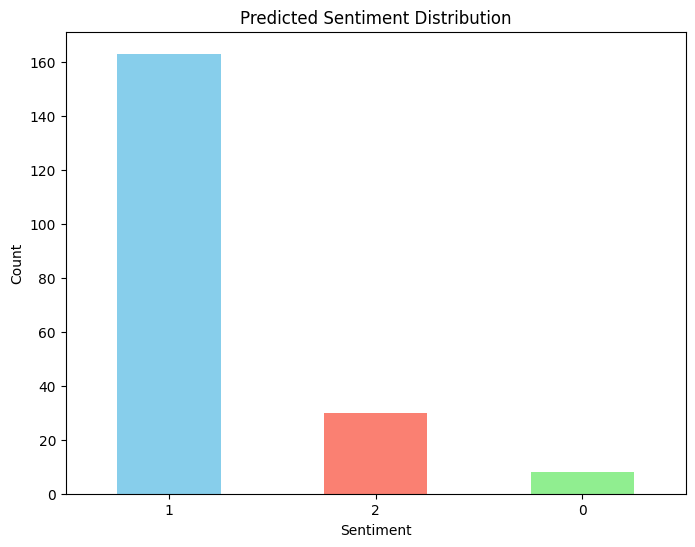

In [ ]:
comments = new_data1['Comment']

TFIDF_new = vectorizer.transform(comments)
predictions = svm_model.predict(TFIDF_new)

new_data1['predicted_sentiment'] = predictions

sentiment_counts = new_data1['predicted_sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])  # You can choose different colors
plt.title('Predicted Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

new_data1.to_excel('predicted_sentiments.xlsx', index=False)

**Mapping sentiments**

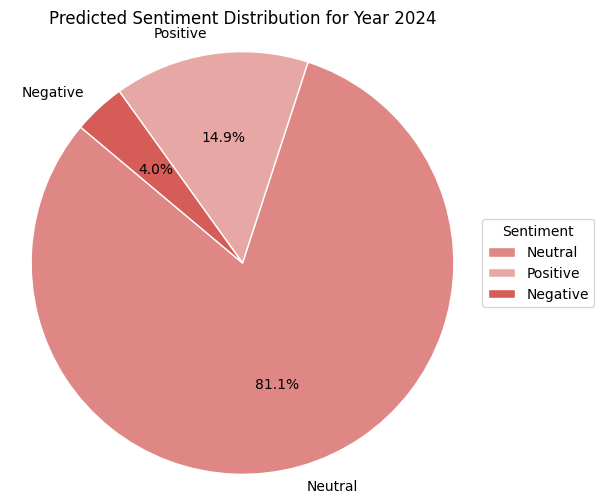

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

sentiment_counts = new_data1['predicted_sentiment'].value_counts()

# Mapping sentiment values (0 -> Negative, 1 -> Neutral, 2 -> Positive) to labels
sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
sentiment_counts.index = sentiment_counts.index.map(sentiment_labels)

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
                                   colors=["#df8785","#e7a8a5","#d65d57"], startangle=140,
                                   wedgeprops={'edgecolor': 'white'})
plt.title('Predicted Sentiment Distribution for Year 2024')

plt.legend(wedges, sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.5))  # Move legend outside

plt.axis('equal')
plt.show()



In [ ]:
# Load the Excel sheet containing comments
excel_file1 = 'youtube_comments_2020.xlsx'
excel_file2 = 'youtube_comments_2021.xlsx'
excel_file3 = 'youtube_comments_2022.xlsx'
excel_file4 = 'youtube_comments_2023.xlsx'
excel_file5 = 'youtube_comments_2024.xlsx'
new_data1 = pd.read_excel(excel_file1)
new_data2 = pd.read_excel(excel_file2)
new_data3 = pd.read_excel(excel_file3)
new_data4 = pd.read_excel(excel_file4)
new_data5 = pd.read_excel(excel_file5)

new_data1['Comment'] = new_data1['Comments'].apply(preprocess)
new_data2['Comment'] = new_data2['Comments'].apply(preprocess)
new_data3['Comment'] = new_data3['Comments'].apply(preprocess)
new_data4['Comment'] = new_data4['Comments'].apply(preprocess)
new_data5['Comment'] = new_data5['text'].apply(preprocess)




**USING SVM FOR FINAL SENTIMENT ANALYSIS  (SVM HAVING HIGHEST PERFORMANCE METRICS )**

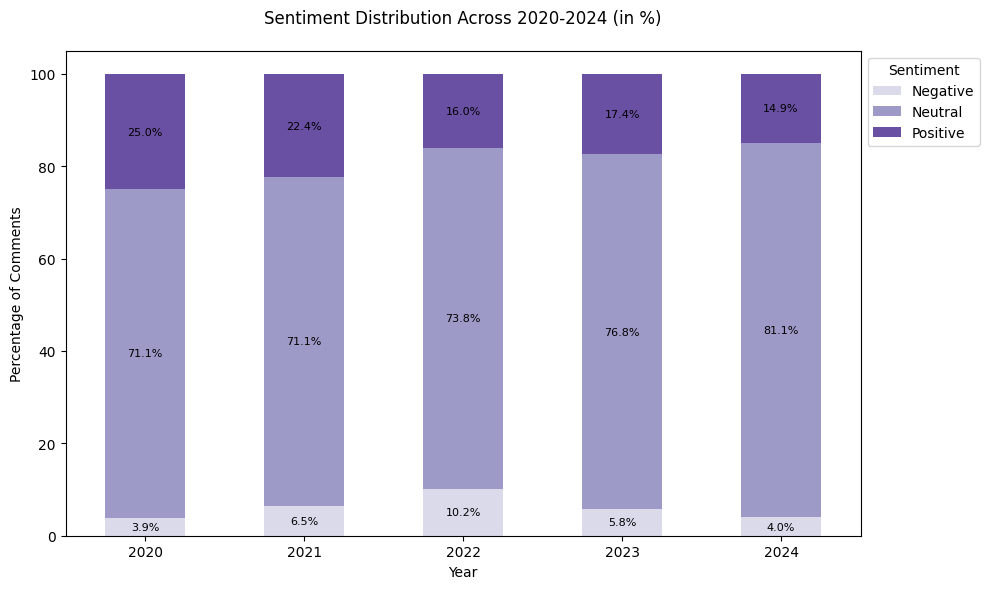

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# List of dataframes for the years 2020 to 2024
dataframes = [new_data1, new_data2, new_data3, new_data4, new_data5]
years = ['2020', '2021', '2022', '2023', '2024']

# Vectorizer and SVM model are already trained

sentiment_distribution = []

# Process each year's data
for i, df in enumerate(dataframes):
    comments = df['Comment']

    # Convert the comments to TF-IDF features using the same vectorizer
    TFIDF_new = vectorizer.transform(comments)

    # Predict sentiment using the trained SVM model
    predictions = svm_model.predict(TFIDF_new)

    # Add the predictions to the dataframe
    df['predicted_sentiment'] = predictions

    # Count the sentiments (0: Negative, 1: Neutral, 2: Positive)
    sentiment_counts = df['predicted_sentiment'].value_counts().sort_index()
    sentiment_distribution.append(sentiment_counts)

# Create a DataFrame for the sentiment counts, aligning by index (sentiment classes)
sentiment_df = pd.DataFrame(sentiment_distribution, index=years).fillna(0)
import numpy as np

# Calculate percentages for each sentiment within each year
sentiment_percentages = sentiment_df.div(sentiment_df.sum(axis=1), axis=0) * 100

# Generate a purple color palette for the sentiments
purple_palette = sns.color_palette("Purples", n_colors=3)  # 3 sentiments: Negative, Neutral, Positive

# Plot a stacked bar chart for sentiment distribution across the years
ax = sentiment_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=purple_palette)

# Add percentages as text annotations on the bars
for bar_group in ax.patches:  # Loop through all the bars
    # Calculate the percentage for the current bar
    bar_height = bar_group.get_height()
    if bar_height > 0:  # Skip bars with no height
        percentage = f"{bar_height:.1f}%"
        x = bar_group.get_x() + bar_group.get_width() / 2
        y = bar_group.get_y() + bar_height / 2
        ax.text(x, y, percentage, ha='center', va='center', fontsize=8, color='black')

# Add labels and title
plt.title('Sentiment Distribution Across 2020-2024 (in %)', pad=20)
plt.xlabel('Year')
plt.ylabel('Percentage of Comments')
plt.xticks(rotation=0)

# Reposition the legend to avoid overlapping
plt.legend(['Negative', 'Neutral', 'Positive'], title='Sentiment', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to fit everything nicely
plt.tight_layout()
plt.show()

plt.show()

